<a href="https://colab.research.google.com/github/Nov05/Lambda-School-Data-Science/blob/master/LSDS_Intro_Assignment_7_More_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School, Intro to Data Science, Day 7 — More Regression!

## Assignment

### 1. Experiment with Nearest Neighbor parameter

Using the same 10 training data points from the lesson, train a `KNeighborsRegressor` model with `n_neighbors=1`.

Use both `carat` and `cut` features.

Calculate the mean absolute error on the training data and on the test data.

In [0]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [0]:
columns = ['carat', 'cut', 'price']

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
              [0.31, 'Ideal', 489],
              [0.42, 'Premium', 737],
              [0.5, 'Ideal', 1415],
              [0.51, 'Premium', 1177],
              [0.7, 'Fair', 1865],
              [0.73, 'Fair', 2351],
              [1.01, 'Good', 3768],
              [1.18, 'Very Good', 3965],
              [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
              [0.34, 'Ideal', 687],
              [0.37, 'Premium', 1124],
              [0.4, 'Good', 720],
              [0.51, 'Ideal', 1397],
              [0.51, 'Very Good', 1284],
              [0.59, 'Ideal', 1437],
              [0.7, 'Ideal', 3419],
              [0.9, 'Premium', 3484],
              [0.9, 'Fair', 2964]])

cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

In [2]:
# train model
features = ['carat', 'cut']
target = 'price'
model = KNeighborsRegressor(n_neighbors=1)
model.fit(train[features], train[target])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [4]:
# calculate train error
y_true = train[target]
y_pred = model.predict(train[features])
train_error = mean_absolute_error(y_true, y_pred)
print("Train error:", train_error)

# calculate test error
y_true = test[target]
y_pred = model.predict(test[features])
test_error = mean_absolute_error(y_true, y_pred)
print("Test error:", test_error)

Train error: 0.0
Test error: 1128.8


How does the train error and test error compare to the previous `KNeighborsRegressor` model from the lesson? (The previous model used `n_neighbors=2` and only the `carat` feature.)

Is this new model overfitting or underfitting? Why do you think this is happening here? 



### 2. More data, two features, linear regression

Use the following code to load data for diamonds under $5,000, and split the data into train and test sets. The training data has almost 30,000 rows, and the test data has almost 10,000 rows.

In [46]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = df[df.price < 5000]
train, test = train_test_split(df.copy(), random_state=0)
train.shape, test.shape

((29409, 10), (9804, 10))

In [31]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
43601,0.31,Very Good,E,SI1,61.2,58.0,507,4.34,4.38,2.67
52706,0.74,Fair,H,VS2,66.1,61.0,2553,5.60,5.57,3.69
1986,0.81,Very Good,G,SI1,62.3,59.0,3095,5.93,5.98,3.71
48617,0.70,Fair,G,SI2,61.5,66.0,1999,5.55,5.60,3.43
10947,0.87,Ideal,G,VS2,61.8,56.0,4899,6.11,6.13,3.78


In [0]:
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

Then, train a Linear Regression model with the `carat` and `cut` features. Calculate the mean absolute error on the training data and on the test data.

In [5]:
# train model 
features = ['carat', 'cut']
target = 'price'
model = LinearRegression()
model.fit(train[features], train[target])

# calculate train error
y_true = train[target]
y_pred = model.predict(train[features])
train_error = mean_absolute_error(y_true, y_pred)
print("Train error:", train_error)

# calculate test error
y_true = test[target]
y_pred = model.predict(test[features])
test_error = mean_absolute_error(y_true, y_pred)
print("Test error:", test_error)

Train error: 309.46586653861294
Test error: 309.5202765379711


Use this model to predict the price of a half carat diamond with "very good" cut

In [24]:
model.predict([[.5, 2]])

array([1415.67155876])

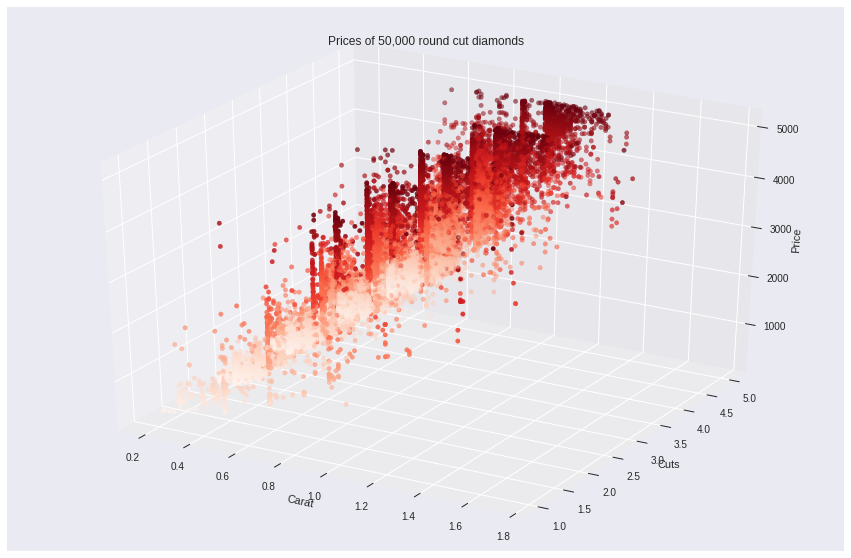

In [17]:
# plot 3-d scatter
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(train.carat, train.cut, train.price, c=train.price, cmap='Reds')

ax.set_title('Prices of 50,000 round cut diamonds')
ax.set_xlabel('Carat')
ax.set_ylabel('Cuts')
ax.set_zlabel('Price');

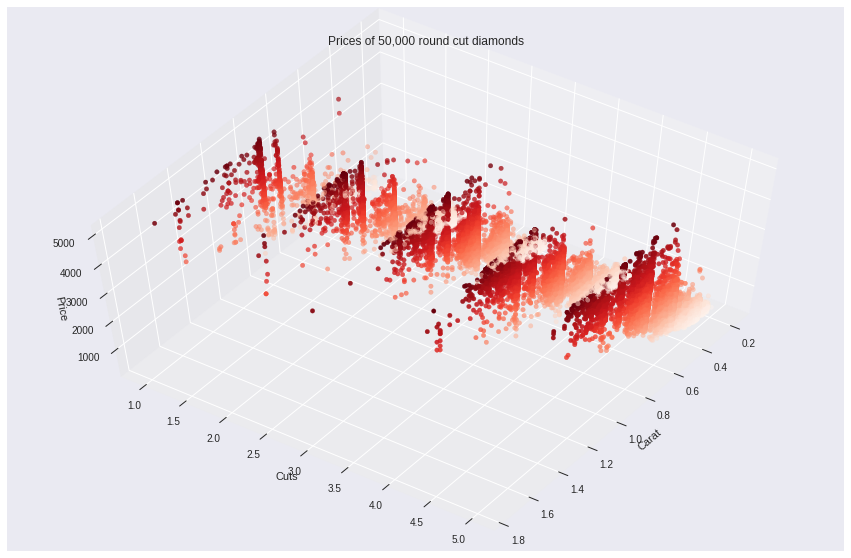

In [18]:
ax.view_init(60, 35)
fig

### 3. More data, more features, any model

You choose what features and model type to use! Try to get a better mean absolute error on the test set than your model from the last question.

Refer to [this documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) for more explanation of the features.

Besides `cut`, there are two more ordinal features, which you'd need to encode as numbers if you want to use in your model:

In [33]:
train.describe(include=['object'])

,color,clarity
count,29409,29409
unique,7,8
top,E,SI1
freq,6090,6948


In [0]:
clarity_rank = {"IF":0,"VVS1":1, "VVS2":2,"VS1":3, "VS2":4,"SI1":5, "SI2":6, "I1":7}
train.clarity = train.clarity.map(clarity_rank)  
test.clarity = test.clarity.map(clarity_rank)  

color_rank = {"J":7, "I":6, "H":5, "G":4, "F":3, "E":2, "D":1 }
train.color = train.color.map(color_rank)
test.color = test.color.map(color_rank)

In [39]:
# find out columns that contain NAs
train.isna().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [49]:
features = ['color','clarity']
target = ['price']
model = LinearRegression()
model.fit(train[features], train[target])

# calculate train error
y_pred = model.predict(train[features])
y_true = train[target]
train_error = mean_absolute_error(y_true, y_pred)
print('Train error:', train_error)

# calulate test error
y_pred = model.predict(test[features])
y_true = test[target]
test_error = mean_absolute_error(y_true, y_pred)
print('Test error:', test_error)

print('Model coeffecient:', model.coef_[0,0])
print('Model intercept:', model.intercept_[0])

Train error: 1030.8859147075877
Test error: 1035.6705252749045
Model coeffecient: 77.75742164923422
Model intercept: 648.4682477199729
